In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the dataset

netflix_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/combined_data_1.txt',header = None , names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
netflix_dataset.iloc[545:570,:]  # from 548 we have movie ID as 2 & it can be cocluded that 546 people has rated movie ID as 1

,Cust_Id,Rating
545,1535440,4.0
546,1426604,4.0
547,1815755,5.0
548,2:,NaN
549,2059652,4.0
550,1666394,3.0
551,1759415,4.0
552,1959936,5.0
553,998862,4.0
554,2625420,2.0


In [ ]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [ ]:
# Checking data type of coloumn
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [ ]:
# netflix_dataset['Rating']=netflix_dataset['Rating'].astype(float)

In [ ]:
# Checking the null value
netflix_dataset.isna().sum()

,0
Cust_Id,0
Rating,4499


In [ ]:
#get the customer count with NaN values

movie_count = netflix_dataset.isnull().sum()
movie_count= movie_count['Rating']

In [ ]:
movie_count

4499

In [ ]:
#to claculate how many customers we are having in the dataset

customer_count = netflix_dataset['Cust_Id'].nunique()
customer_count

475257

In [ ]:
#without NaN values

customer_count = customer_count - movie_count
customer_count

470758

**470758** This is the unique customer count we have in the dataset

In [ ]:
#get the total number of ratings given by the customers

rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

In [ ]:
# Cross vereifying whether the count is correct or not

netflix_dataset['Rating'].count()

24053764

In [ ]:
# getting the unique rating in the dataset

netflix_dataset['Rating'].unique()

array([nan,  3.,  5.,  4.,  2.,  1.])

In [ ]:
#Finding out how many people have rated the movies as 1,2,3,4,5 stars ratings to the movies
stars= netflix_dataset['Rating'].value_counts()
stars

,count
Rating,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


** Above count can also be done using the aggregate function **

In [ ]:
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


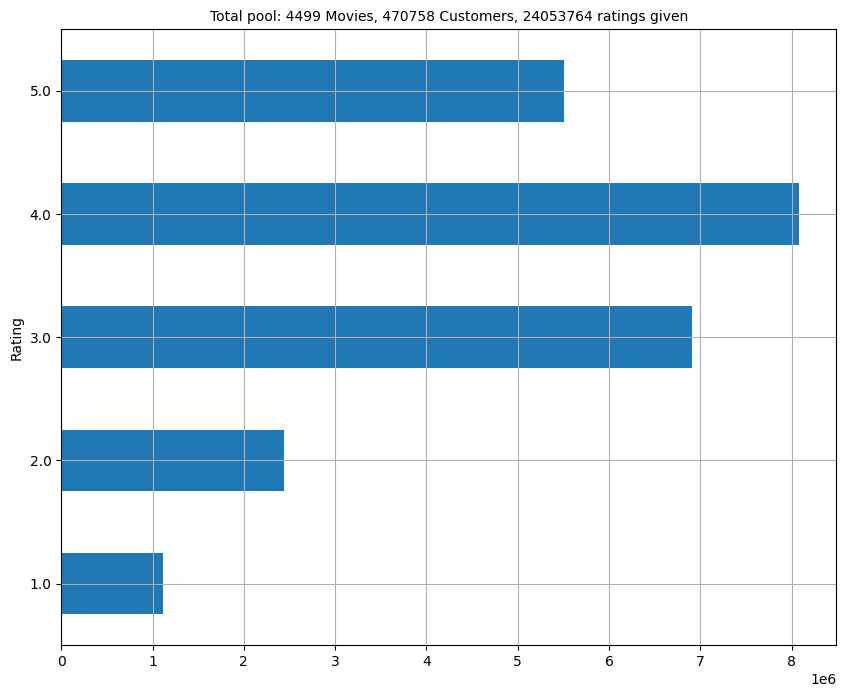

In [ ]:
ax=stars.plot(kind='barh', legend=False, figsize=(10,8))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=10)
plt.grid(True)

In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
current_movie_id=None
movie_ids = []

# Iterate over the DataFrame rows
for cust_id in netflix_dataset['Cust_Id']:
    if ':' in cust_id:
        # Update the current movie ID
      current_movie_id = int(cust_id.replace(':', ''))
    movie_ids.append(current_movie_id)

# Add the new column to the DataFrame
netflix_dataset['Movie_Id'] = movie_ids

# Remove movie IDs from the CustID column
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]

print(netflix_dataset)

          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
2          822109     5.0         1
3          885013     4.0         1
4           30878     4.0         1
5          823519     3.0         1
...           ...     ...       ...
24058258  2591364     2.0      4499
24058259  1791000     2.0      4499
24058260   512536     5.0      4499
24058261   988963     3.0      4499
24058262  1704416     3.0      4499

[24053764 rows x 3 columns]


In [ ]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,0
Movie_Id,0


In [ ]:
netflix_dataset['Movie_Id']=netflix_dataset['Movie_Id'].astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
netflix_dataset

<ipython-input-23-8e35dae9e42b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=netflix_dataset['Movie_Id'].astype(int)
<ipython-input-23-8e35dae9e42b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
#pre-filtering

In [ ]:
#now we will remove all the users that have rated less movies and also all those movies that has been rated less in numbers

In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
# Creating a Benchmark
dataset_movie_summary["count"].quantile(0.6)  # 60th Percentile

907.7999999999997

In [ ]:
dataset_movie_summary["count"].quantile(0.6).round()

908.0

In [ ]:
dataset_movie_summary['count']

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [ ]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
len(drop_movie_list)


2699

In [ ]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [ ]:
len(drop_cust_list)

282042

In [ ]:
#we will remove all the customers and movies that are below the benchmark
# print('The original dataframe has: ', netflix_dataset.shape, 'shape')

In [ ]:
# netflix_dataset['Movie_Id'].isin(drop_movie_list)

In [ ]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

# df_title.set_index('Movie_Id', inplace=True)

In [ ]:
df_title.head(10)

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
6,7,1992.0,8 Man
7,8,2004.0,What the #$*! Do We Know!?
8,9,1991.0,Class of Nuke 'Em High 2
9,10,2001.0,Fighter


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357284 sha256=2f5cba1974f5fe6ec7a22538576219bcc751117a70313af32032c936f85b6906
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
#model building

# import math
# import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
#help us to read the dataset for svd algo
reader=Reader()

In [ ]:
#we only work with top 100K rows for quick runtime
data = Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)
data

In [ ]:
model=SVD()
model
# cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)
#for 1st fold- 1,2,3,4,5

In [ ]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

{'test_rmse': array([1.02123474, 1.02093499, 1.02050772, 1.01354268]),
 'test_mae': array([0.82093847, 0.82407546, 0.82165399, 0.81157873]),
 'fit_time': (2.155362129211426,
  3.604431629180908,
  6.86108136177063,
  6.8993237018585205),
 'test_time': (0.5818591117858887,
  0.6168463230133057,
  0.5911929607391357,
  1.7763166427612305)}

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
# so first we take any random user 1331154 and we try to recommend some movies based on the past data
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_1331154=df_title.copy()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
user_1331154
# user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-53-ef7ee761d5fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,4.032834
4,5,2004.0,The Rise and Fall of ECW,3.797392
5,6,1997.0,Sick,3.382599
7,8,2004.0,What the #$*! Do We Know!?,3.407248
15,16,1996.0,Screamers,2.997416
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.667415
17766,17767,2004.0,Fidel Castro: American Experience,3.667415
17767,17768,2000.0,Epoch,3.667415
17768,17769,2003.0,The Company,3.667415


In [ ]:
user_1331154=user_1331154.sort_values('Estimate_Score',ascending=False)
user_1331154

,Movie_Id,Year,Name,Estimate_Score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.289106
2,3,1997.0,Character,4.032834
27,28,2002.0,Lilo and Stitch,3.873106
4,5,2004.0,The Rise and Fall of ECW,3.797392
29,30,2003.0,Something's Gotta Give,3.735273
...,...,...,...,...
17,18,1994.0,Immortal Beloved,3.381805
16,17,2005.0,7 Seconds,3.171969
15,16,1996.0,Screamers,2.997416
23,24,1981.0,My Bloody Valentine,2.813261


In [ ]:
user_1331154.head(5)

,Movie_Id,Year,Name,Estimate_Score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.289106
2,3,1997.0,Character,4.032834
27,28,2002.0,Lilo and Stitch,3.873106
4,5,2004.0,The Rise and Fall of ECW,3.797392
29,30,2003.0,Something's Gotta Give,3.735273
